In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from VGG_hc import VGG19
import time
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0,1'
%matplotlib inline

## Processing

In [2]:
# 利用torchvision对图像数据预处理
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomAffine(degrees=15,scale=(0.8,1.5)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

trainset = torchvision.datasets.ImageFolder(root='../data/train/', transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=4)

valset = torchvision.datasets.ImageFolder(root='../data/val/', transform=val_transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=128, shuffle=False, num_workers=4)

In [9]:
# 展示训练样本和测试样本数
print(len(trainloader))
print(len(valloader))
# CPU 或者 GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# 初始化网络,加载预训练模型
model = VGG19(num_classes=2, init_weights=False)
model_dict = model.state_dict()
state_dict = torch.load('pretrained/vgg19-dcbb9e9d.pth')
new_state_dict = {k: v for k, v in state_dict.items() if k in model_dict}
model_dict.update(new_state_dict)
model.load_state_dict(model_dict)

165
32


## Training

We are using 2 GPUs!
epoch 0,iter 20,train accuracy: 63.5547%   loss:  0.6335
epoch 0,iter 40,train accuracy: 83.4766%   loss:  0.4123
epoch 0,iter 60,train accuracy: 86.4453%   loss:  0.3179
epoch 0,iter 80,train accuracy: 86.3672%   loss:  0.2857
epoch 0,iter 100,train accuracy: 89.7656%   loss:  0.2436
epoch 0,iter 120,train accuracy: 89.6094%   loss:  0.2351
epoch 0,iter 140,train accuracy: 91.0938%   loss:  0.1999
epoch 0,iter 160,train accuracy: 90.3125%   loss:  0.2011
waitting for Val...
epoch 0  The ValSet accuracy is 98.3000% 

Find Better Model and Saving it...
Saved!
Training complete in 3m 5s
Now the best val Acc is 98.3000%
epoch 1,iter 20,train accuracy: 91.1328%   loss:  0.1857
epoch 1,iter 40,train accuracy: 91.9922%   loss:  0.1810
epoch 1,iter 60,train accuracy: 91.7188%   loss:  0.1898
epoch 1,iter 80,train accuracy: 90.8203%   loss:  0.1916
epoch 1,iter 100,train accuracy: 92.6172%   loss:  0.1683
epoch 1,iter 120,train accuracy: 91.9922%   loss:  0.1691
epoch 1,it

/home/huangchao/anaconda3/envs/Funny/lib/python3.6/site-packages/ipykernel_launcher.py:91: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Training complete in 21m 53s
Now the best val Acc is 98.7000%
epoch 7,iter 20,train accuracy: 92.6953%   loss:  0.1612
epoch 7,iter 40,train accuracy: 93.5938%   loss:  0.1377
epoch 7,iter 60,train accuracy: 94.1016%   loss:  0.1337
epoch 7,iter 80,train accuracy: 93.6328%   loss:  0.1413
epoch 7,iter 100,train accuracy: 94.1406%   loss:  0.1212
epoch 7,iter 120,train accuracy: 93.8672%   loss:  0.1365
epoch 7,iter 140,train accuracy: 93.0859%   loss:  0.1451
epoch 7,iter 160,train accuracy: 93.9062%   loss:  0.1360


/home/huangchao/anaconda3/envs/Funny/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/huangchao/anaconda3/envs/Funny/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


waitting for Val...
epoch 7  The ValSet accuracy is 98.7000% 

Training complete in 24m 57s
Now the best val Acc is 98.7000%
epoch 8,iter 20,train accuracy: 93.5156%   loss:  0.1388
epoch 8,iter 40,train accuracy: 94.3359%   loss:  0.1349
epoch 8,iter 60,train accuracy: 94.1406%   loss:  0.1331
epoch 8,iter 80,train accuracy: 95.0000%   loss:  0.1358
epoch 8,iter 100,train accuracy: 94.3750%   loss:  0.1278
epoch 8,iter 120,train accuracy: 94.3359%   loss:  0.1272
epoch 8,iter 140,train accuracy: 93.6328%   loss:  0.1414
epoch 8,iter 160,train accuracy: 93.2031%   loss:  0.1559
waitting for Val...
epoch 8  The ValSet accuracy is 98.7000% 

Training complete in 28m 1s
Now the best val Acc is 98.7000%
epoch 9,iter 20,train accuracy: 94.8828%   loss:  0.1180
epoch 9,iter 40,train accuracy: 94.1016%   loss:  0.1394
epoch 9,iter 60,train accuracy: 93.1641%   loss:  0.1476
epoch 9,iter 80,train accuracy: 93.6719%   loss:  0.1306
epoch 9,iter 100,train accuracy: 93.4766%   loss:  0.1380
epoch

<Figure size 792x576 with 0 Axes>

<Figure size 792x576 with 0 Axes>

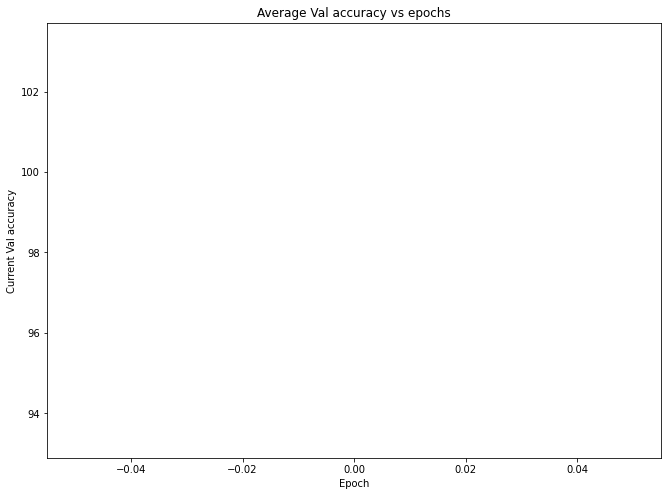

<Figure size 792x576 with 0 Axes>

<Figure size 792x576 with 0 Axes>

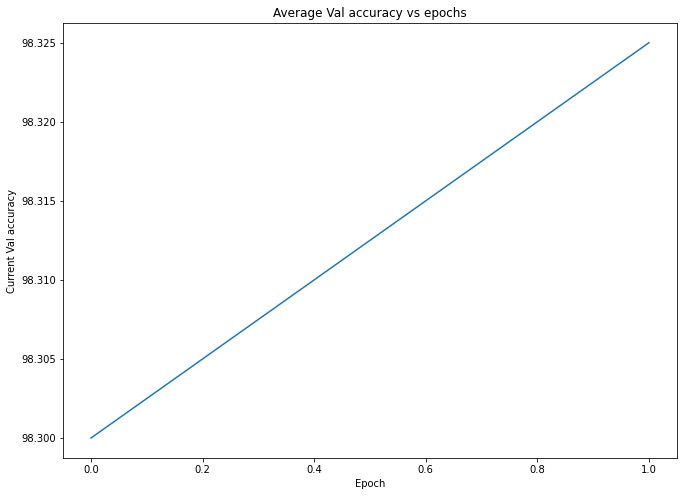

<Figure size 792x576 with 0 Axes>

<Figure size 792x576 with 0 Axes>

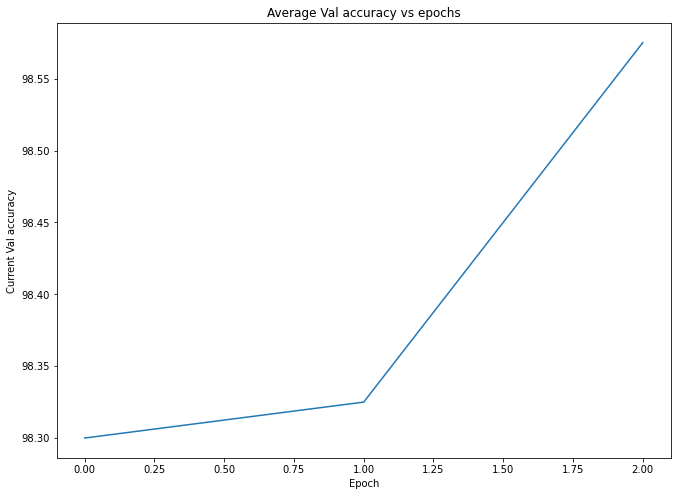

<Figure size 792x576 with 0 Axes>

<Figure size 792x576 with 0 Axes>

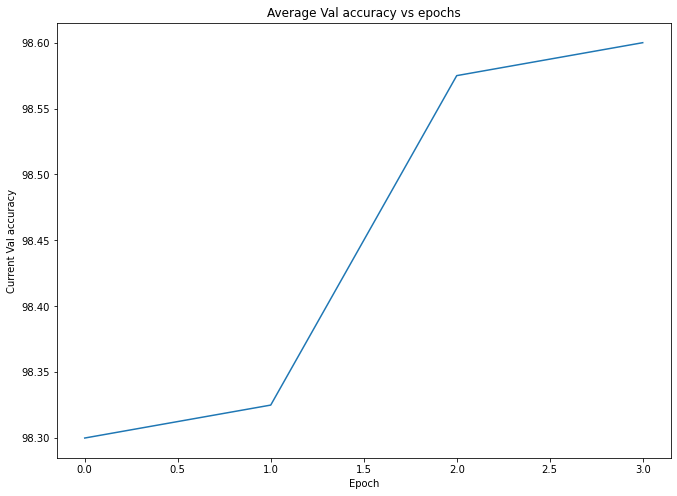

<Figure size 792x576 with 0 Axes>

<Figure size 792x576 with 0 Axes>

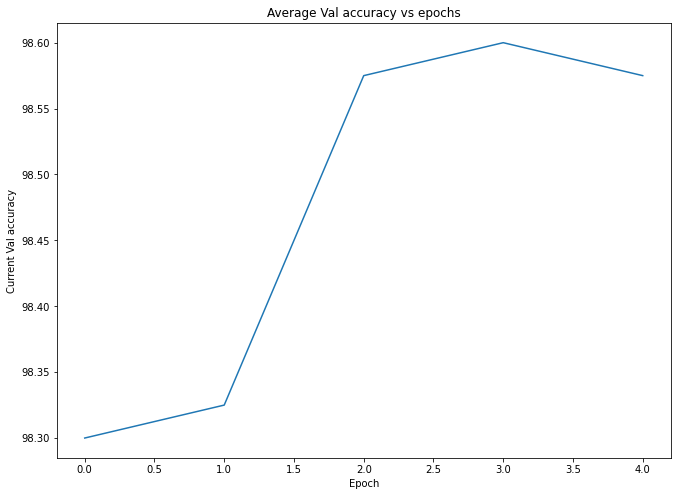

<Figure size 792x576 with 0 Axes>

<Figure size 792x576 with 0 Axes>

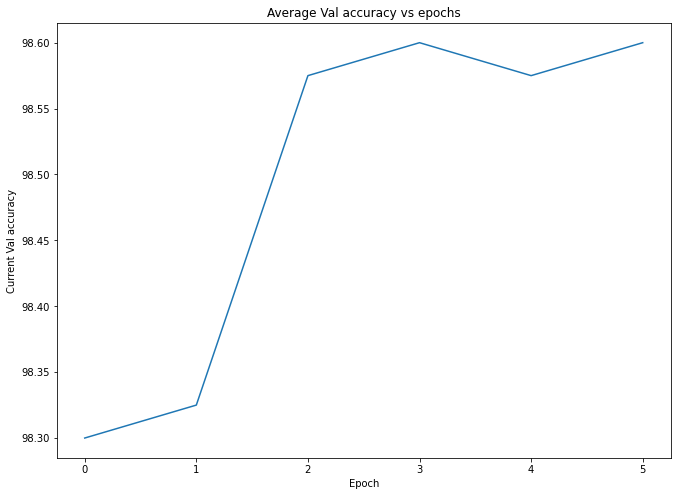

<Figure size 792x576 with 0 Axes>

<Figure size 792x576 with 0 Axes>

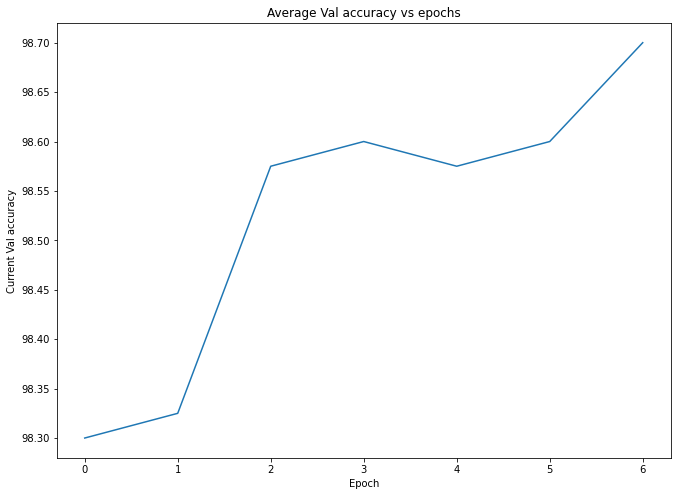

<Figure size 792x576 with 0 Axes>

<Figure size 792x576 with 0 Axes>

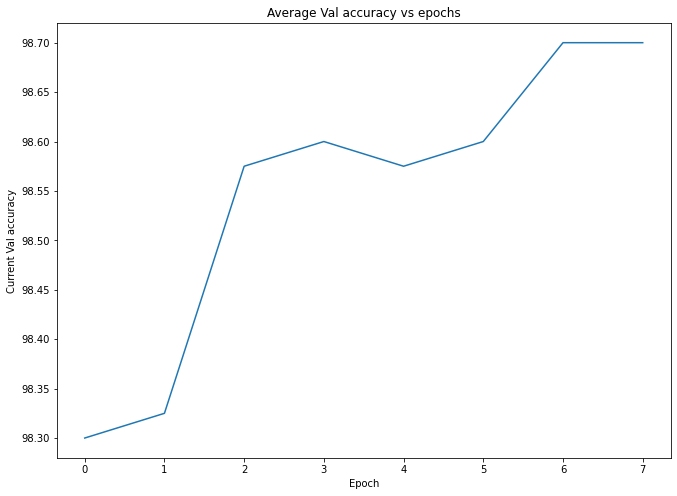

<Figure size 792x576 with 0 Axes>

<Figure size 792x576 with 0 Axes>

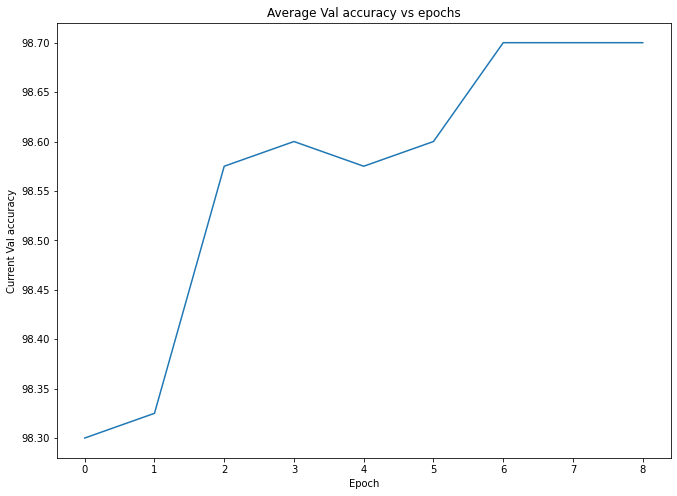

<Figure size 792x576 with 0 Axes>

<Figure size 792x576 with 0 Axes>

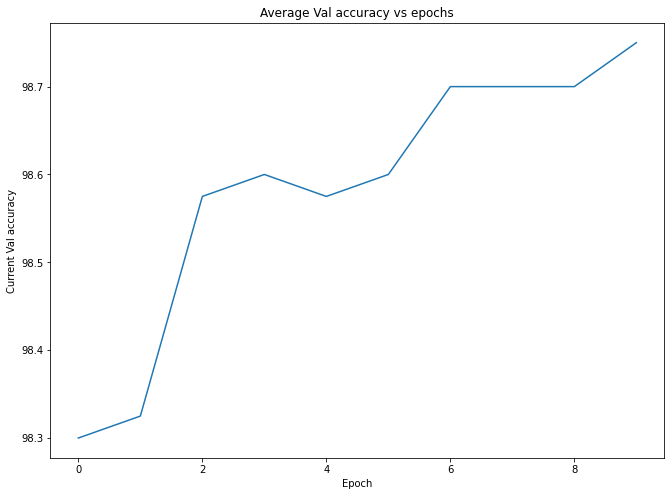

In [10]:
# 查看GPU可用情况
if torch.cuda.device_count()>1:
    print('We are using',torch.cuda.device_count(),'GPUs!')
    model = nn.DataParallel(model)
model.to(device)

# 定义loss function和优化器
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

# 保存每个epoch后的Accuracy Loss Val_Accuracy
Accuracy = []
Loss = []
Val_Accuracy = []
BEST_VAL_ACC = 0.
# 训练
since = time.time()
for epoch in range(10):
    train_loss = 0.
    train_accuracy = 0.
    run_accuracy = 0.
    run_loss =0.
    total = 0.
    model.train()
    for i,data in enumerate(trainloader,0):
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)  
        # 经典四步
        optimizer.zero_grad()
        outs = model(images)
        loss = criterion(outs, labels)
        loss.backward()
        optimizer.step()
        # 输出状态
        total += labels.size(0)
        run_loss += loss.item()
        _,prediction = torch.max(outs,1)
        run_accuracy += (prediction == labels).sum().item()
        if i % 20 == 19:
            print('epoch {},iter {},train accuracy: {:.4f}%   loss:  {:.4f}'.format(epoch, i+1, 100*run_accuracy/(labels.size(0)*20), run_loss/20))
            train_accuracy += run_accuracy
            train_loss += run_loss
            run_accuracy, run_loss = 0., 0.
    Loss.append(train_loss/total)
    Accuracy.append(100*train_accuracy/total)
    # 可视化训练过程
    fig1, ax1 = plt.subplots(figsize=(11, 8))
    ax1.plot(range(0, epoch+1, 1), Accuracy)
    ax1.set_title("Average trainset accuracy vs epochs")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Avg. train. accuracy")
    plt.savefig('Train_accuracy_vs_epochs.png')
    plt.clf()
    plt.close()
    
    fig2, ax2 = plt.subplots(figsize=(11, 8))
    ax2.plot(range(epoch+1), Loss)
    ax2.set_title("Average trainset loss vs epochs")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Current loss")
    plt.savefig('loss_vs_epochs.png')

    plt.clf()
    plt.close()
    # 验证
    acc = 0.
    model.eval()
    print('waitting for Val...')
    with torch.no_grad():
        accuracy = 0.
        total =0
        for data in valloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            out = model(images)
            _, prediction = torch.max(out, 1)
            total += labels.size(0)
            accuracy += (prediction == labels).sum().item()
            acc = 100.*accuracy/total
    print('epoch {}  The ValSet accuracy is {:.4f}% \n'.format(epoch, acc))
    Val_Accuracy.append(acc)
    if acc > BEST_VAL_ACC:
        print('Find Better Model and Saving it...')
        if not os.path.isdir('checkpoint'):
            os.mkdir('checkpoint')
        torch.save(model.state_dict(), './checkpoint/VGG19_Cats_Dogs_hc.pth')
        BEST_VAL_ACC = acc
        print('Saved!')
    
    fig3, ax3 = plt.subplots(figsize=(11, 8))

    ax3.plot(range(epoch+1),Val_Accuracy )
    ax3.set_title("Average Val accuracy vs epochs")
    ax3.set_xlabel("Epoch")
    ax3.set_ylabel("Current Val accuracy")

    plt.savefig('val_accuracy_vs_epoch.png')
    plt.close()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed%60))
    print('Now the best val Acc is {:.4f}%'.format(BEST_VAL_ACC))